In [5]:
import os, sys
import networkx as nx
sys.path.append('../../../')
import Holes as ho
import pickle as pk
import matplotlib.pyplot as plt
%matplotlib inline

Read the network in a graph object:

In [6]:
G = nx.read_weighted_edgelist('../datasets/celegans_weighted_undirected.edges');

Once the network has been loaded, one needs to produce the filtration of the network.  
This can be done in different ways. The simplest is to rank the edges in descending order and use their rank as the indices for the sequence of simplicial complex.   
Holes contains a few options for different filtrations (ascending, descending, metrical..).   
Below we consider the one with descending weights described in [http://www.plosone.org/article/info%3Adoi%2F10.1371%2Fjournal.pone.0066506]:

In [7]:
fil = ho.filtrations.standard_weight_clique_rank_filtration(G)

Preliminary scan of edge weights to define filtration steps...
Constructing filtration...
Max filtration value: 30
Clique dictionary created.


Once the filtration has been created, it needs to be saved and passed to jython, so that javaplex can receive the 
data and process it.  
This requires calling a subprocess and feeding it the right file. 

In [8]:
clique_dictionary_file = './output_celegans/celegans_filtration.pck'
pk.dump(fil,open(clique_dictionary_file,'w'))

In [14]:
hom_dim = 1 # max homology group calculated
dataset_tag = 'test_celegans'
output_dir = './output_celegans/';
ho.persistent_homology_calculation(clique_dictionary_file, hom_dim, dataset_tag, output_dir,m1=512, m2=2048)

Calling: jython  ../../../Holes/jython_utils/persistent_homology_calculation.py ./output_celegans/celegans_filtration.pck 1 ./output_celegans/ test_celegans_ ../../../Holes/jython_utils/lib/ False


Child returned 0


The generator is now saved in the directory: ./output/gen/generators_test_celegans_.pck

In [15]:
gen_file = './output_celegans/gen/generators_test_celegans_.pck'
gen = pk.load(open(gen_file))

The properties of each generator can be listed easily:

In [16]:
gen[1][0].summary()

Homology group= 1
Starting at 22.0 and ending at 23.0
Composed by:
 ['234', '305']
 ['169', '234']
 ['151', '305']
 ['151', '169']


One can also simply produce the barcodes for the network then: 

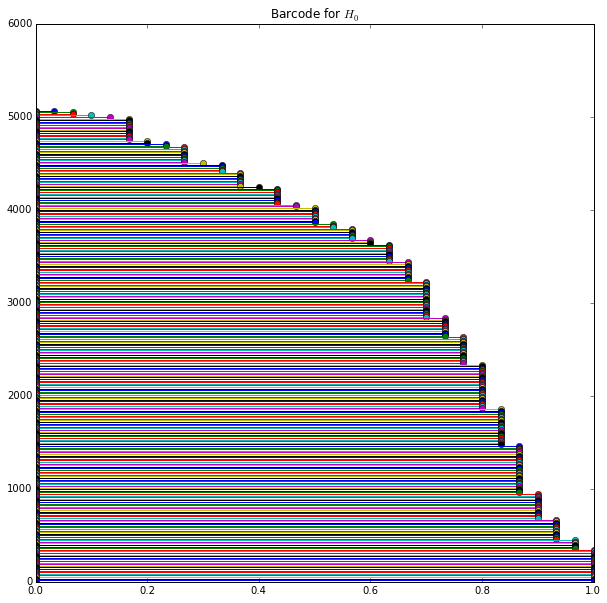

In [12]:
ho.barcode_creator(gen[0])
plt.title(r'Barcode for $H_0$')

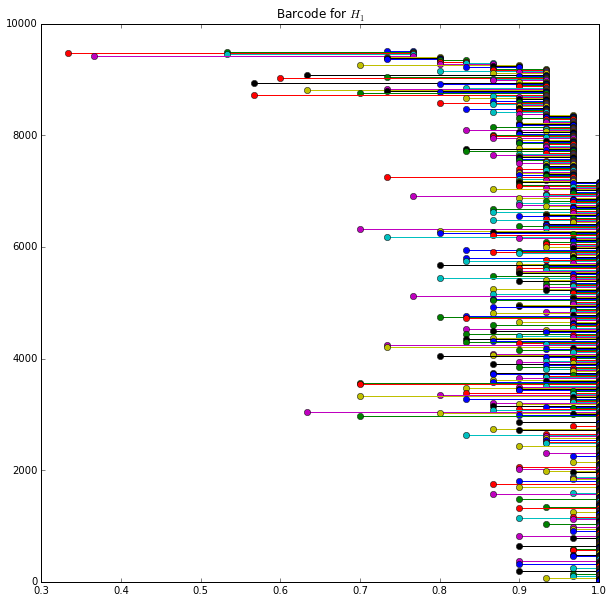

In [13]:
ho.barcode_creator(gen[1])
plt.title(r'Barcode for $H_1$')